___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>


# AutoEncoders on Image Data

## The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


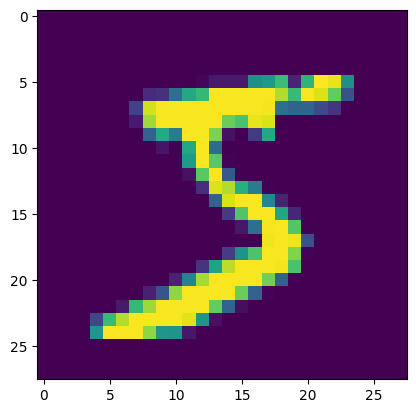

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
783/2

391.5

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [9]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [10]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [11]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.6901 - accuracy: 0.0335 - val_loss: 0.6868 - val_accuracy: 0.0411
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6803 - accuracy: 0.0428 - val_loss: 0.6643 - val_accuracy: 0.0442
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3976 - accuracy: 0.0605 - val_loss: 0.2724 - val_accuracy: 0.0672
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2695 - accuracy: 0.0706 - val_loss: 0.2665 - val_accuracy: 0.0688
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2653 - accuracy: 0.0700 - val_loss: 0.2635 - val_accuracy: 0.0702


In [12]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 185ms/step


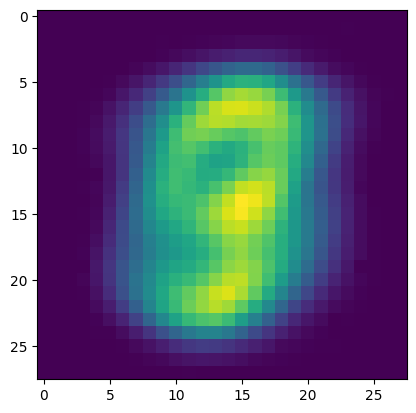

In [13]:
plt.imshow(passed_images[0])

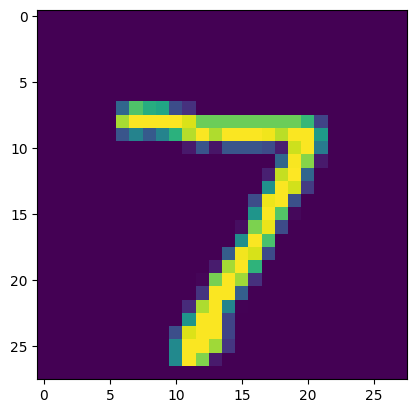

In [14]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [15]:
from tensorflow.keras.layers import GaussianNoise

In [16]:
sample = GaussianNoise(0.2)

In [17]:
noisey = sample(X_test[0:2],training=True)

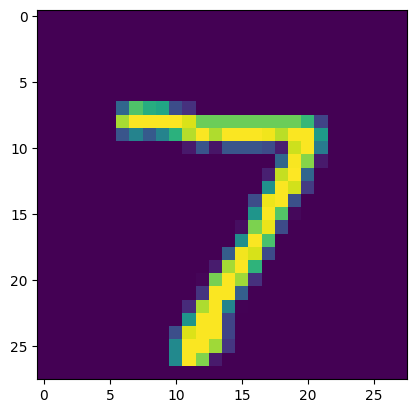

In [18]:
plt.imshow(X_test[0])

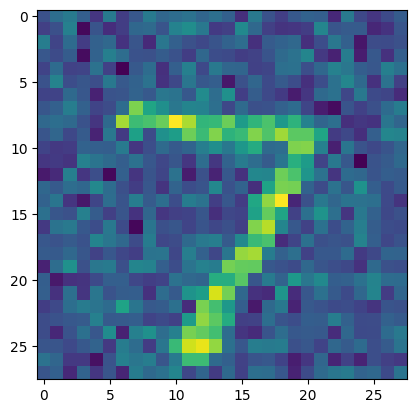

In [19]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [20]:
import tensorflow as tf
import numpy as np

In [21]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [22]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [23]:
noise_remover = Sequential([encoder, decoder])

In [24]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [25]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1694 - accuracy: 0.1840 - val_loss: 0.1373 - val_accuracy: 0.2249
Epoch 2/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1339 - accuracy: 0.2293 - val_loss: 0.1253 - val_accuracy: 0.2338
Epoch 3/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1246 - accuracy: 0.2407 - val_loss: 0.1182 - val_accuracy: 0.2472
Epoch 4/8
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1193 - accuracy: 0.2484 - val_loss: 0.1144 - val_accuracy: 0.2561
Epoch 5/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1163 - accuracy: 0.2533 - val_loss: 0.1120 - val_accuracy: 0.2574
Epoch 6/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1136 - accuracy: 0.2581 - val_loss: 0.1090 - val_accuracy: 0.2587
Epoch 7/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1109 - accuracy: 0.2628 - val_loss: 0.1061 - val_ac

In [26]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


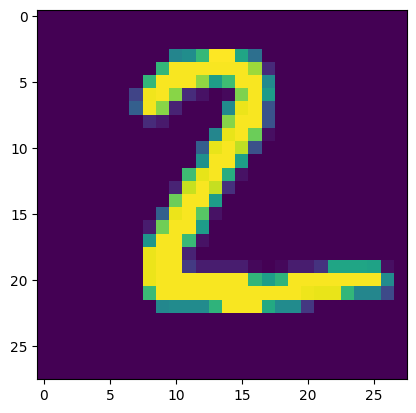

The Noisey Version


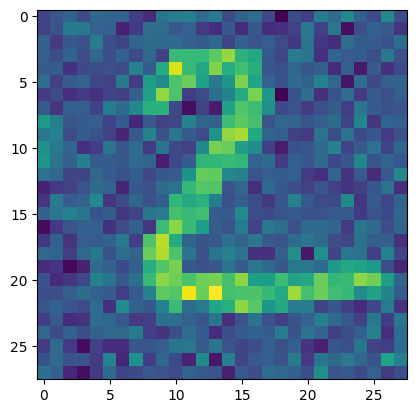

After going through denoiser


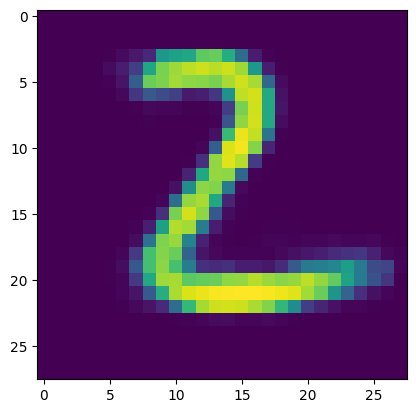

In [27]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()